In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

Explorations de donnees



In [2]:
customers = pd.read_csv("datas/olist_customers_dataset.csv")
order_items = pd.read_csv("datas/olist_order_items_dataset.csv")
order_payments = pd.read_csv("datas/olist_order_payments_dataset.csv")
orders = pd.read_csv("datas/olist_orders_dataset.csv")

In [3]:
dataset = {
    'Customers': customers,
    'Order Items': order_items,
    'Payments': order_payments,
    'Orders': orders
}

In [4]:
#Shapes
for x,y in dataset.items():
    print(x,y.shape)

Customers (99441, 5)
Order Items (112650, 7)
Payments (103886, 5)
Orders (99441, 8)


In [5]:
#Finding NaN values
for x,y in dataset.items():
    print(x,'\n')
    print(y.isna().sum(),'\n')

Customers 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Order Items 

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Payments 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Orders 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 



In [6]:
#Finding duplicates
for x,y in dataset.items():
    print(x,'\n')
    print(y.duplicated().sum(),'\n')

Customers 

0 

Order Items 

0 

Payments 

0 

Orders 

0 



In [7]:
df = pd.merge(orders,order_payments,on='order_id')
df = df.merge(customers,on='customer_id')
df = df.merge(order_items,on='order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [8]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.093528,2.939482,172.686752,35051.793097,1.195900,120.824783,20.045990
std,0.726692,2.774223,267.592290,29820.588877,0.697706,184.479323,15.861315
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.870000,11310.000000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.210000,24315.000000,1.000000,74.900000,16.290000
75%,1.000000,4.000000,189.260000,58600.000000,1.000000,134.900000,21.190000
max,29.000000,24.000000,13664.080000,99990.000000,21.000000,6735.000000,409.680000


In [9]:
df['order_purchase_timestamp'] =pd.to_datetime(df['order_purchase_timestamp'])

In [10]:
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    if is_string_dtype(df[column]):
        cat_list.append(column)

print("Numerical data :",num_list)
print("Categorical data :",cat_list)

Numerical data : ['payment_sequential', 'payment_installments', 'payment_value', 'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value']
Categorical data : ['order_id', 'customer_id', 'order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_type', 'customer_unique_id', 'customer_city', 'customer_state', 'product_id', 'seller_id', 'shipping_limit_date']


RFM Analysis

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer's behavior because frequency and monetary value affects a customer's lifetime value, and recency affects retention, a measure of engagement.

https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png


RECENCY
Pour calculer la récence, nous devons connaître la date d'achat la plus récente de chaque client et voir pendant combien de jours ils sont inactifs

In [11]:
users = pd.DataFrame(df['customer_unique_id'])

#grouping customers by their most recent purchase
recency = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()

# we find the most recent purchase value
most_recent_purchase_date = df['order_purchase_timestamp'].dt.date.max()

#we convert the timestamps into datetime object
recency["order_purchase_timestamp"] = recency["order_purchase_timestamp"].dt.date

#now ce calculate recency score for each customers
recency['Recency'] = recency['order_purchase_timestamp'].apply(lambda x: (most_recent_purchase_date - x).days)
recency.drop(columns='order_purchase_timestamp')



,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119
2,0000f46a3911fa3c0805444483337064,542
3,0000f6ccb0745a6a4b88665a16c9f078,326
4,0004aac84e0df4da2b147fca70cf8255,293
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,452
95415,fffea47cd6d3cc0a88bd621562a9d061,267
95416,ffff371b4d645b6ecea244b27531430a,573
95417,ffff5962728ec6157033ef9805bacc48,124


FREQUENCY
its the total number orders for each customer

In [12]:
frequency = df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
frequency.rename(columns={'order_purchase_timestamp':'Frequency'},inplace=True)
frequency

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


MONETARY

Monetary score is assigned on the basis of the total revenue generated by the customer in the period under consideration for the analysis. Customers with highest revenue/order amount are assigned a higher score.

In [13]:
monetary = df.groupby('customer_unique_id').payment_value.sum().reset_index()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
95415,fffea47cd6d3cc0a88bd621562a9d061,84.58
95416,ffff371b4d645b6ecea244b27531430a,112.46
95417,ffff5962728ec6157033ef9805bacc48,133.69


In [14]:
#merge the dataframes
rf = recency.merge(frequency, on='customer_unique_id')
rfm = rf.merge(monetary, on='customer_unique_id').drop(columns='order_purchase_timestamp')

rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,4134.84
95415,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
95416,ffff371b4d645b6ecea244b27531430a,573,1,112.46
95417,ffff5962728ec6157033ef9805bacc48,124,1,133.69


In [15]:
def distribution_plot(column):
    plt.title('Distribution of ' + column)
    sns.distplot(rfm[column])
    plt.show()
    return

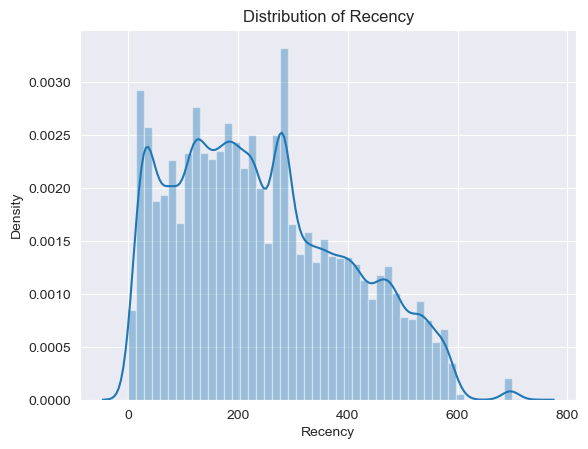

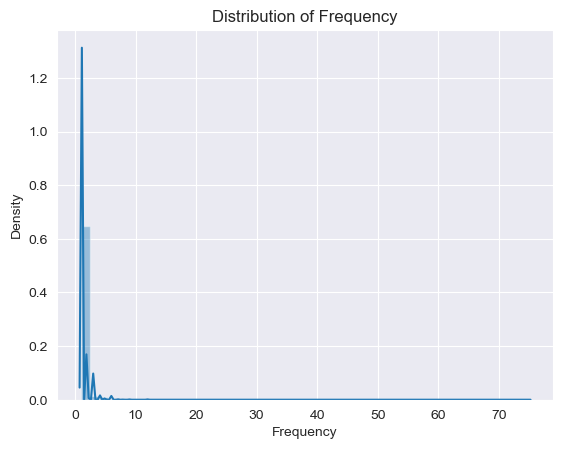

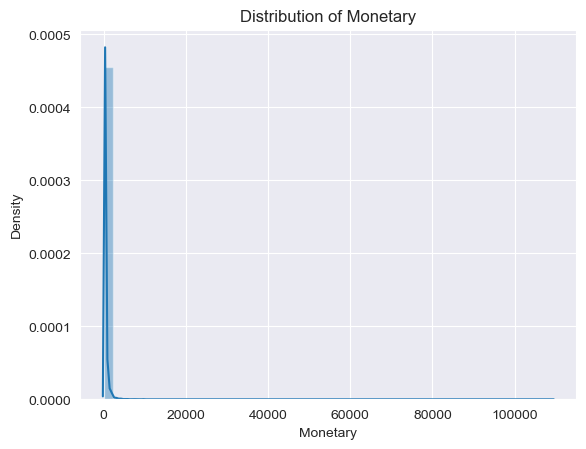

In [16]:
for col in rfm.columns[1:]:
    distribution_plot(col)